# Step 1: Import Libraries

In [1]:
import re
import scipy
import string
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report




# Step 2: Read, Understand & Pre-process Train/Test Data

In [3]:
train_file_path = '/content/Gender_Identification_test.csv'
test_file_path = '/content/Gender_Identification_train.csv'

train_dataset = pd.read_csv(train_file_path)
test_dataset = pd.read_csv(test_file_path)

print("\n\nAttributes in the train dataset")
print(train_dataset.columns)

print("\n\nTrain instances:",train_dataset.shape[0])
print("\nTrain dataset columns:\n")
print(train_dataset)
original_train_dataset = train_dataset.copy()
original_test_dataset = test_dataset.copy()



Attributes in the train dataset
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')


Train instances: 4

Train dataset columns:

   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female


In [4]:
print("\n\nAttributes in the tesT dataset")
print(test_dataset.columns)

print("\n\nTest instances:",test_dataset.shape[0])
print("\nTest dataset columns:\n")
print(test_dataset)



Attributes in the tesT dataset
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')


Test instances: 6

Test dataset columns:

     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female


In [5]:
train_Male = train_dataset[train_dataset['gender']=='Male']
train_Female = train_dataset[train_dataset['gender']=='Female']
print("Train male instances:",train_Male.shape[0])
train_dataset.index.names = ['INDEX']
train_dataset.columns.name = train_dataset.index.name
train_dataset.index.name = None
print(train_Male)



print("Train female instances:",train_Female.shape[0])
train_dataset.index.names = ['INDEX']
train_dataset.columns.name = train_dataset.index.name
train_dataset.index.name = None
print(train_Female)

Train male instances: 2
INDEX  height  weight  hair beard scarf gender
0       179.1     185  Long   Yes    No   Male
2       177.8     160  Bald    No    No   Male
Train female instances: 2
INDEX  height  weight    hair beard scarf  gender
1       160.5     130   Short    No    No  Female
3       161.1     100  Medium    No    No  Female


In [6]:
test_Male = test_dataset[test_dataset['gender']=='Male']
test_Female = test_dataset[test_dataset['gender']=='Female']
print("Test male instances:",test_Male.shape[0])
test_dataset.index.names = ['INDEX']
test_dataset.columns.name = test_dataset.index.name
test_dataset.index.name = None
print(test_Male)



print("Test female instances:",test_Female.shape[0])
test_dataset.index.names = ['INDEX']
test_dataset.columns.name = test_dataset.index.name
test_dataset.index.name = None
print(test_Female)

Test male instances: 3
INDEX    height  weight   hair beard scarf gender
0      180.3000     196   Bald   Yes    No   Male
2      178.5000     200  Short    No    No   Male
4      175.2222     220  Short   Yes    No   Male
Test female instances: 3
INDEX  height  weight    hair beard scarf  gender
1       170.0     120    Long    No    No  Female
3       163.4     110  Medium    No   Yes  Female
5       165.0     150  Medium    No   Yes  Female


### Uderstanding Data via Graphs

Total numbr of Males and Females in train dataset


<Axes: xlabel='Gender'>

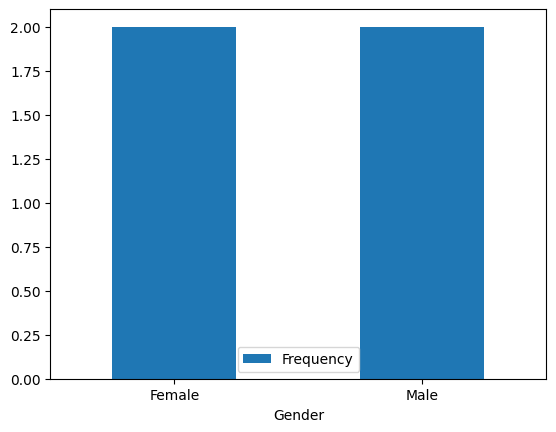

In [7]:
print("Total numbr of Males and Females in train dataset")
graph_df = pd.DataFrame({'Gender':['Female','Male'],'Frequency':[2,2]})
graph_df.plot.bar(x='Gender',y='Frequency',rot=0)

Total numbr of Males and Females in test dataset


<Axes: xlabel='Gender'>

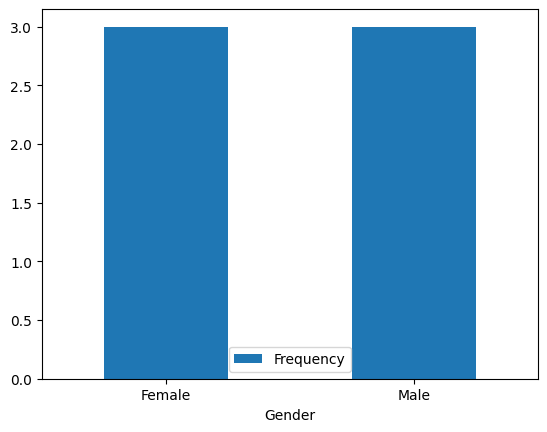

In [8]:
print("Total numbr of Males and Females in test dataset")
graph_df = pd.DataFrame({'Gender':['Female','Male'],'Frequency':[3,3]})
graph_df.plot.bar(x='Gender',y='Frequency',rot=0)


Number of people having various hair length in train dataset



<Axes: xlabel='hair'>

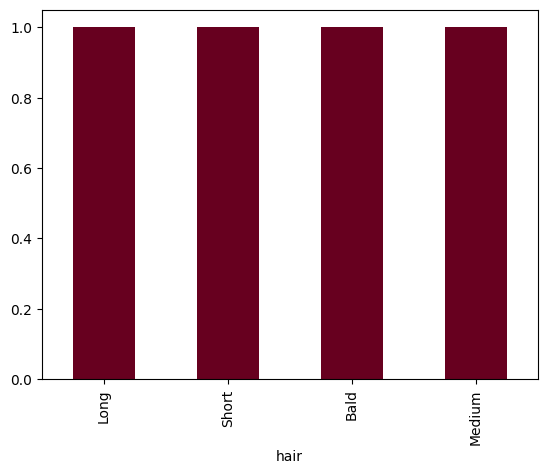

In [9]:
print("Number of people having various hair length in train dataset\n")
train_hair = train_dataset['hair'].value_counts()
train_hair.plot(kind='bar', stacked = True, colormap='RdGy')

Number of people having various hair length in test dataset



<Axes: xlabel='hair'>

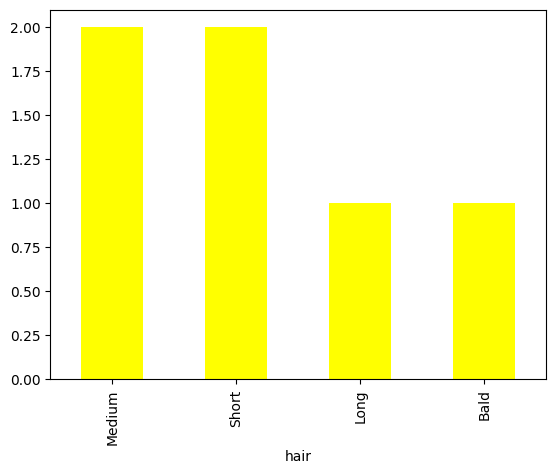

In [10]:
print("Number of people having various hair length in test dataset\n")
test_hair = test_dataset['hair'].value_counts()
test_hair.plot(kind='bar', stacked = True, color='yellow')

Number of people having beard or not in train dataset



<Axes: xlabel='beard'>

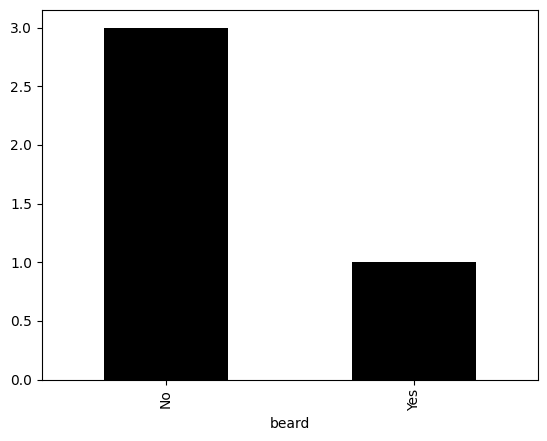

In [11]:
print("Number of people having beard or not in train dataset\n")
train_beard = train_dataset['beard'].value_counts()
train_beard.plot(kind='bar', stacked = True, color='black')


Number of people having beard or not in test dataset



<Axes: xlabel='beard'>

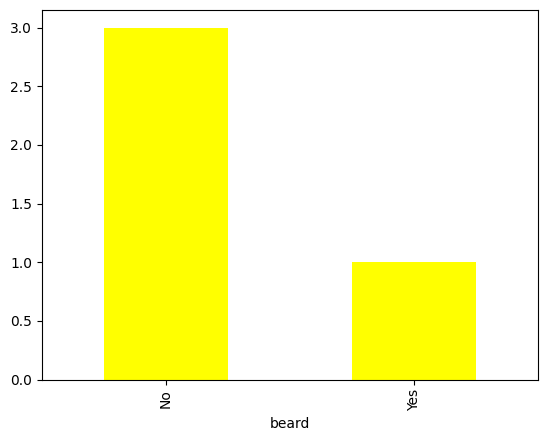

In [12]:
print("Number of people having beard or not in test dataset\n")
test_beard = train_dataset['beard'].value_counts()
test_beard.plot(kind='bar', stacked = True, color='yellow')


### Step 2.3: Pre-Process Data

In [13]:
print("Test data before pre processing\n\n")
print(test_dataset)

test_dataset.fillna('')

test_dataset.height = round(test_dataset.height, 2)
print("Test data after pre processing\n\n")
print(test_dataset)

Test data before pre processing


INDEX    height  weight    hair beard scarf  gender
0      180.3000     196    Bald   Yes    No    Male
1      170.0000     120    Long    No    No  Female
2      178.5000     200   Short    No    No    Male
3      163.4000     110  Medium    No   Yes  Female
4      175.2222     220   Short   Yes    No    Male
5      165.0000     150  Medium    No   Yes  Female
Test data after pre processing


INDEX  height  weight    hair beard scarf  gender
0      180.30     196    Bald   Yes    No    Male
1      170.00     120    Long    No    No  Female
2      178.50     200   Short    No    No    Male
3      163.40     110  Medium    No   Yes  Female
4      175.22     220   Short   Yes    No    Male
5      165.00     150  Medium    No   Yes  Female


# Step 3: Label Encoding for Test/Train Data

#### Label encoding train dataset

In [32]:
print("Attributes label encoding in train dataset\n")
train_dataset['gender'] = train_dataset['gender'].astype(str)
labelEncoder_gender = LabelEncoder()
gender = ['Male','Female']
labelEncoder_gender.fit(train_dataset['gender'].unique())

train_gender_encoding = pd.DataFrame(labelEncoder_gender.transform(train_dataset['gender']))
train_dataset['gender'] = train_gender_encoding

train_dataset['scarf'] = train_dataset['scarf'].astype(str)
labelEncoder_scarf = LabelEncoder()
scarf = ['Yes','No']
labelEncoder_scarf.fit(train_dataset['scarf'].unique())

train_scarf_encoding = pd.DataFrame(labelEncoder_scarf.transform(train_dataset['scarf']))
train_dataset['scarf'] = train_scarf_encoding

train_dataset['beard'] = train_dataset['beard'].astype(str)
labelEncoder_beard = LabelEncoder()
beard = ['Yes','No']
labelEncoder_beard.fit(train_dataset['beard'].unique())

train_beard_encoding = pd.DataFrame(labelEncoder_beard.transform(train_dataset['beard']))
train_dataset['beard'] = train_beard_encoding


train_dataset['hair'] = train_dataset['hair'].astype(str)
labelEncoder_hair = LabelEncoder()
hair = ['Bald','Short','Medium','Long']
labelEncoder_hair.fit(train_dataset['hair'].unique())

train_hair_encoding = pd.DataFrame(labelEncoder_hair.transform(train_dataset['hair']))
train_dataset['hair'] = train_hair_encoding
print(train_dataset)

Attributes label encoding in train dataset

INDEX  height  weight  hair  beard  scarf  gender
0       179.1     185     1      1      0       1
1       160.5     130     3      0      0       0
2       177.8     160     0      0      0       1
3       161.1     100     2      0      0       0


In [15]:
print("Before encoding\n")
print(original_train_dataset)

print("\nAfter encoding")
print(train_dataset)


Before encoding

   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female

After encoding
INDEX  height  weight  hair  beard  scarf  gender
0       179.1     185     1      1      0       1
1       160.5     130     3      0      0       0
2       177.8     160     0      0      0       1
3       161.1     100     2      0      0       0


#### Label encoding test dataset

In [16]:
print("Before encoding\n")
print(original_test_dataset)

print("Attributes label encoding in train dataset\n")
test_dataset['gender'] = test_dataset['gender'].astype(str)
labelEncoder_gender = LabelEncoder()
gender = ['Male','Female']
labelEncoder_gender.fit(test_dataset['gender'].unique())

test_gender_encoding = pd.DataFrame(labelEncoder_gender.transform(test_dataset['gender']))
test_dataset['gender'] = test_gender_encoding

test_dataset['scarf'] = test_dataset['scarf'].astype(str)
labelEncoder_scarf = LabelEncoder()
scarf = ['Yes','No']
labelEncoder_scarf.fit(test_dataset['scarf'].unique())

test_scarf_encoding = pd.DataFrame(labelEncoder_scarf.transform(test_dataset['scarf']))
test_dataset['scarf'] = test_scarf_encoding

test_dataset['beard'] = test_dataset['beard'].astype(str)
labelEncoder_beard = LabelEncoder()
beard = ['Yes','No']
labelEncoder_beard.fit(test_dataset['beard'].unique())

test_beard_encoding = pd.DataFrame(labelEncoder_beard.transform(test_dataset['beard']))
test_dataset['beard'] = test_beard_encoding


test_dataset['hair'] = train_dataset['hair'].astype(str)
labelEncoder_hair = LabelEncoder()
hair = ['Bald','Short','Medium','Long']
labelEncoder_hair.fit(test_dataset['hair'].unique())
test_hair_encoding = pd.DataFrame(labelEncoder_hair.transform(test_dataset['hair']))
test_dataset['hair'] = test_hair_encoding
print(test_dataset)

Before encoding

     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female
Attributes label encoding in train dataset

INDEX  height  weight  hair  beard  scarf  gender
0      180.30     196     1      1      0       1
1      170.00     120     3      0      0       0
2      178.50     200     0      0      0       1
3      163.40     110     2      0      1       0
4      175.22     220     4      1      0       1
5      165.00     150     4      0      1       0


# Step 5: Train Machine Learning Algorithms using Training Data

In [24]:
train = train_dataset[['height','weight','hair','beard','scarf']]
test = test_dataset[['height','weight','hair','beard','scarf']]
sparse_train_features = scipy.sparse.csr_matrix(train.values)
sparse_test_features = scipy.sparse.csr_matrix(test.values)
model_names =[]
logistic_regression = LogisticRegression()
print("Parameters and their values:\n")

print(logistic_regression)
logistic_regression.fit(sparse_train_features,np.ravel(train_dataset.gender))
model_names.append("Logistic Regression")



Parameters and their values:

LogisticRegression()


In [25]:
random_forest_classifier = RandomForestClassifier()
print("Parameters and their values:\n")
print(random_forest_classifier)
random_forest_classifier.fit(sparse_train_features,np.ravel(train_dataset.gender))
model_names.append('RandomForestClassifier')




Parameters and their values:

RandomForestClassifier()


In [26]:
linear_svc = LinearSVC()
print("Parameters and their values:\n")
print(linear_svc)
linear_svc.fit(sparse_train_features,np.ravel(train_dataset.gender))
model_names.append('LinearSVC')

Parameters and their values:

LinearSVC()


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
bernoulli_nb = BernoulliNB()
print("Parameters and their values:\n")
print(bernoulli_nb)
bernoulli_nb.fit(sparse_train_features,np.ravel(train_dataset[['gender']]))
model_names.append('BernoulliNB')

Parameters and their values:

BernoulliNB()


# Step 6: Evaluate Machine Learning Algorithms using Test Data

In [218]:
scores = []
model_names.append("Logistic Regression")
y_true = train_dataset['gender']
y_pred = logistic_regression.predict(sparse_train_features)
score=round(accuracy_score(y_true, y_pred),2)
inverse_transform = labelEncoder_gender.inverse_transform(y_pred)
print("Prediction using Logistic Regression (Train Data)")
print(train_dataset.assign(prdeicted_gender=inverse_transform))
print("Train Accuracy score = ",score)
scores.append(score) # Append train score

y_test_true = test_dataset['gender']
y_test_pred = logistic_regression.predict(sparse_test_features)
score = round(accuracy_score(y_test_true, y_test_pred), 2)
inverse_test_transform = labelEncoder_gender.inverse_transform(y_test_pred)

print("\nPrediction using Logistic Regression (Test Data)")
print(test_dataset.assign(predicted_gender=inverse_test_transform))
print("Test Accuracy score = ", score)

scores.append(score)

Prediction using Logistic Regression (Train Data)
INDEX  height  weight  hair  beard  scarf  gender prdeicted_gender
0       179.1     185     1      1      0       1                1
1       160.5     130     3      0      0       0                0
2       177.8     160     0      0      0       1                1
3       161.1     100     2      0      0       0                0
Train Accuracy score =  1.0

Prediction using Logistic Regression (Test Data)
INDEX  height  weight  hair  beard  scarf  gender predicted_gender
0      180.30     196     1      1      0       1                1
1      170.00     120     3      0      0       0                0
2      178.50     200     0      0      0       1                1
3      163.40     110     2      0      1       0                0
4      175.22     220     4      1      0       1                1
5      165.00     150     4      0      1       0                0
Test Accuracy score =  1.0


In [217]:
scores=[]
model_names.append("Random Forest")
y_true = train_dataset['gender']
y_pred = random_forest_classifier.predict(sparse_train_features)
score=round(accuracy_score(y_true, y_pred),2)
inverse_transform = labelEncoder_gender.inverse_transform(y_pred)
print("Prediction using Random Forest Classifier")
print(train_dataset.assign(prdeicted_gender=inverse_transform))
print("Accuracy score = ",score)
scores.append(score)

y_test_true = test_dataset['gender']
y_test_pred = random_forest_classifier.predict(sparse_test_features)
score = round(accuracy_score(y_test_true, y_test_pred), 2)
inverse_test_transform = labelEncoder_gender.inverse_transform(y_test_pred)

print("\nPrediction using Random Forest Classifier (Test Data)")
print(test_dataset.assign(predicted_gender=inverse_test_transform))
print("Test Accuracy score = ", score)

scores.append(score)



Prediction using Random Forest Classifier
INDEX  height  weight  hair  beard  scarf  gender prdeicted_gender
0       179.1     185     1      1      0       1                1
1       160.5     130     3      0      0       0                0
2       177.8     160     0      0      0       1                1
3       161.1     100     2      0      0       0                0
Accuracy score =  1.0

Prediction using Random Forest Classifier (Test Data)
INDEX  height  weight  hair  beard  scarf  gender predicted_gender
0      180.30     196     1      1      0       1                1
1      170.00     120     3      0      0       0                0
2      178.50     200     0      0      0       1                1
3      163.40     110     2      0      1       0                0
4      175.22     220     4      1      0       1                1
5      165.00     150     4      0      1       0                0
Test Accuracy score =  1.0


In [215]:
scores=[]
model_names.append("Linear SVC")
y_true = train_dataset['gender']
y_pred = linear_svc.predict(sparse_train_features)
score=round(accuracy_score(y_true, y_pred),2)
inverse_transform = labelEncoder_gender.inverse_transform(y_pred)
print("Prediction using Linear SVC")
print(train_dataset.assign(prdeicted_gender=inverse_transform))
print("Accuracy score = ",score)
scores.append(score)

y_test_true = test_dataset['gender']
y_test_pred = linear_svc.predict(sparse_test_features)
score = round(accuracy_score(y_test_true, y_test_pred), 2)
inverse_test_transform = labelEncoder_gender.inverse_transform(y_test_pred)

print("\nPrediction using Linear SVC (Test Data)")
print(test_dataset.assign(predicted_gender=inverse_test_transform))
print("Test Accuracy score =", score)

scores.append(score)


Prediction using Linear SVC
INDEX  height  weight  hair  beard  scarf  gender prdeicted_gender
0       179.1     185     1      1      0       1                1
1       160.5     130     3      0      0       0                0
2       177.8     160     0      0      0       1                1
3       161.1     100     2      0      0       0                0
Accuracy score =  1.0

Prediction using Linear SVC (Test Data)
INDEX  height  weight  hair  beard  scarf  gender predicted_gender
0      180.30     196     1      1      0       1                1
1      170.00     120     3      0      0       0                0
2      178.50     200     0      0      0       1                1
3      163.40     110     2      0      1       0                0
4      175.22     220     4      1      0       1                1
5      165.00     150     4      0      1       0                1
Test Accuracy score = 0.83


In [216]:
scores = []
model_names.append("BernoulliNB")
y_train_true = train_dataset['gender']
y_train_pred = bernoulli_nb.predict(sparse_train_features)
train_score = round(accuracy_score(y_train_true, y_train_pred), 2)
inverse_transform= labelEncoder_gender.inverse_transform(y_train_pred)

print("Prediction using Bernoulli NB (Train)")
print(train_dataset.assign(predicted_gender=inverse_transform))
print("Train Accuracy Score =", score)

scores.append(score)


y_test_true = test_dataset['gender']
y_test_pred = bernoulli_nb.predict(sparse_test_features)
score = round(accuracy_score(y_test_true, y_test_pred), 2)
inverse_test_transform = labelEncoder_gender.inverse_transform(y_test_pred)

print("\nPrediction using Bernoulli NB (Test)")
print(test_dataset.assign(predicted_gender=inverse_test_transform))
print("Test Accuracy Score =", score)

scores.append(score)


Prediction using Bernoulli NB (Train)
INDEX  height  weight  hair  beard  scarf  gender predicted_gender
0       179.1     185     1      1      0       1                1
1       160.5     130     3      0      0       0                0
2       177.8     160     0      0      0       1                1
3       161.1     100     2      0      0       0                0
Train Accuracy Score = 0.83

Prediction using Bernoulli NB (Test)
INDEX  height  weight  hair  beard  scarf  gender predicted_gender
0      180.30     196     1      1      0       1                1
1      170.00     120     3      0      0       0                0
2      178.50     200     0      0      0       1                1
3      163.40     110     2      0      1       0                0
4      175.22     220     4      1      0       1                1
5      165.00     150     4      0      1       0                0
Test Accuracy Score = 1.0


# PHASE 3: APPLICATION PHASE

# Step 8: Application Phase

### Step 8.1: Combine Data (Train+Test)

In [206]:
train_features_df = pd.DataFrame(sparse_train_features.toarray(),columns =['height','weight','hair','beard','gender'] )
test_features_df = pd.DataFrame(sparse_test_features.toarray(),columns =['height','weight','hair','beard','gender'] )
print("train features in form of dataframe:\n")
train_features_df.index.names = ['INDEX']
train_features_df.columns.name = train_features_df.index.name
train_features_df.index.name = None
print(train_features_df.assign(gender=train_dataset['gender']))

train features in form of dataframe:

INDEX  height  weight  hair  beard  gender
0       179.1   185.0   1.0    1.0       1
1       160.5   130.0   3.0    0.0       0
2       177.8   160.0   0.0    0.0       1
3       161.1   100.0   2.0    0.0       0


In [205]:
print("test features in form of dataframe:\n")
test_features_df.index.names = ['INDEX']
test_features_df.columns.name = test_features_df.index.name
test_features_df.index.name = None
print(test_features_df.assign(gender=test_dataset['gender']))

test features in form of dataframe:

INDEX  height  weight  hair  beard  gender
0      180.30   196.0   1.0    1.0       1
1      170.00   120.0   3.0    0.0       0
2      178.50   200.0   0.0    0.0       1
3      163.40   110.0   2.0    0.0       0
4      175.22   220.0   4.0    1.0       1
5      165.00   150.0   4.0    0.0       0


In [204]:
all_features_df = pd.concat([train_features_df,test_features_df])
print("All features of train and test dataset")
print(all_features_df.assign(gender=pd.concat([train_dataset['gender'],test_dataset['gender']])))
all_feature = scipy.sparse.csr_matrix(all_features_df.values)

All features of train and test dataset
INDEX  height  weight  hair  beard  gender
0      179.10   185.0   1.0    1.0       1
1      160.50   130.0   3.0    0.0       0
2      177.80   160.0   0.0    0.0       1
3      161.10   100.0   2.0    0.0       0
0      180.30   196.0   1.0    1.0       1
1      170.00   120.0   3.0    0.0       0
2      178.50   200.0   0.0    0.0       1
3      163.40   110.0   2.0    0.0       0
4      175.22   220.0   4.0    1.0       1
5      165.00   150.0   4.0    0.0       0


### Step 8.2: Train Best Model (see Step 7) on all features (Train+Test)

In [221]:
bernoulli_nb.fit(all_feature,np.ravel(pd.concat([train_dataset['gender'],test_dataset['gender']])))


BernoulliNB()

### Step 8.3: Save the trained model in Pickle file

In [222]:
pickle.dump(bernoulli_nb, open('model.pkl', 'wb'))

# Step 9: Make prediction on unseen/new data

In [223]:
classifier = pickle.load(open('model.pkl', 'rb'))

### Step 9.2: Take Input from User

In [241]:
height = float(input("Please enter your height here (centimeter):").strip())
weight = int(input("Please enter your weight here(kg):").strip())
hair = input("Please enter you Hair length here(Bald/Long/Short/Medium):".strip())
beard = input("Please enter you Beard here(Yes/No):".strip())
scarf = input("Please enter you Scarf here(Yes/No):".strip())

Please enter your height here (centimeter):180
Please enter your weight here(kg):52
Please enter you Hair length here(Bald/Long/Short/Medium):Medium
Please enter you Beard here(Yes/No):Yes
Please enter you Scarf here(Yes/No):No


### Step 9.3: Convert User Input into Feature Vector (Same as Feature Vector of Trained Model)

In [242]:
user_input_df = pd.DataFrame({'Height':[height],'Weight':[weight],'Hair':[hair],'Beard':[beard],'Scarf':[scarf]})
user_input_df = user_input_df[['Height','Weight','Hair','Beard','Scarf']]
print("User input in actual daataframe form\n")
print(user_input_df)

User input in actual daataframe form

   Height  Weight    Hair Beard Scarf
0   180.0      52  Medium   Yes    No


In [243]:
print("User input in actual form\n")
print(user_input_df)

user_input_df.Hair = user_input_df.Hair.replace(['Bald','Long','Short','Medium'],[0,1,2,3])
user_input_df.Scarf = user_input_df.Scarf.replace(['Yes','No'],[1,0])
user_input_df.Beard = user_input_df.Beard.replace(['Yes','No'],[1,0])
print("\nUser input in Encoded DataFrame form:\n")
print(user_input_df)
sparse_matrix = scipy.sparse.csr_matrix(user_input_df.values)

User input in actual form

   Height  Weight    Hair Beard Scarf
0   180.0      52  Medium   Yes    No

User input in Encoded DataFrame form:

   Height  Weight  Hair  Beard  Scarf
0   180.0      52     3      1      0


/tmp/ipython-input-243-2938365783.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_input_df.Hair = user_input_df.Hair.replace(['Bald','Long','Short','Medium'],[0,1,2,3])
/tmp/ipython-input-243-2938365783.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_input_df.Scarf = user_input_df.Scarf.replace(['Yes','No'],[1,0])
/tmp/ipython-input-243-2938365783.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_

### Step 9.4: Apply Trained Model on Feature Vector of Unseen Data and Output Prediction (Male/Female) to User

Prediction: Male


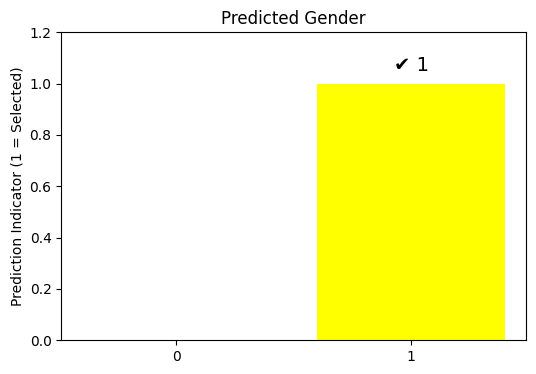

In [250]:
import matplotlib.pyplot as plt

# Predict the class
pred = classifier.predict(sparse_matrix)
predicted_label = labelEncoder_gender.inverse_transform(pred)[0]

# Print text output
print("Prediction:", end=' ')
if(pred==1):
  print("Male")
if(pred==0):
  print("Female")



labels = list(labelEncoder_gender.classes_)
values = [1 if label == predicted_label else 0 for label in labels]


plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color = 'yellow')
plt.ylim(0, 1.2)
plt.title("Predicted Gender")
plt.ylabel("Prediction Indicator (1 = Selected)")


for i, v in enumerate(values):
    if v == 1:
        plt.text(i, v + 0.05, f"✔ {labels[i]}", ha='center', fontsize=14, color='black')

plt.show()
